# **K Nearest Neighbors with Python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Get the Data**

Set index_col = 0 as the first column as the index

In [5]:
df = pd.read_csv("/content/Classified Data.csv", index_col=0)

In [6]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# **Standardize the Variables**

Because the KNN classifier predicts the class of the given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any varibles that are on a larger scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [11]:
scaled_features = scaler.transform(df.drop("TARGET CLASS", axis = 1))

In [14]:
df_feat = pd.DataFrame(scaled_features, columns= df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# **Train Test Split**

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df["TARGET CLASS"], test_size = 0.30)

# **Using KNN**

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
pred = knn.predict(X_test)

# **Predictions and Evaluations**

Evaluation of KNN model

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(confusion_matrix(y_test,pred))

[[131  14]
 [ 15 140]]


In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       145
           1       0.91      0.90      0.91       155

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



# **Choosing a K Value**

Using elbow method to pick a good K Value

In [31]:
error_rate = []

#Will take some time
for i in range(1,40):
  knn= KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

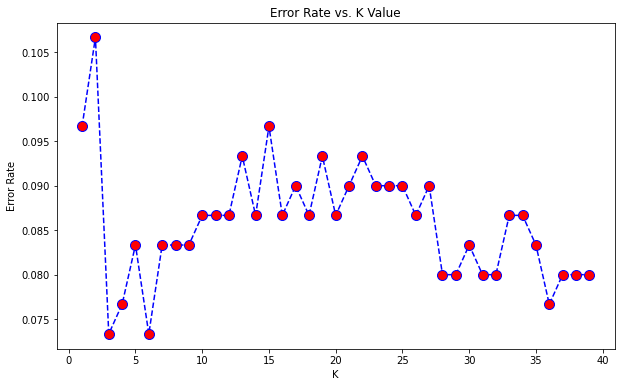

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue' , linestyle = 'dashed' , marker = 'o', markerfacecolor ='red', markersize = 10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

Here we can see that there is dip where K>7 but we do not take that value of k as it can lead to **overfitting**. Hence, we take it around 0.08-0.075

In [37]:
#First a quick comparison to our original K=1

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print ("WITH K+1")
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

WITH K+1


[[131  14]
 [ 15 140]]


              precision    recall  f1-score   support

           0       0.90      0.90      0.90       145
           1       0.91      0.90      0.91       155

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [40]:
#Now with K=36

knn = KNeighborsClassifier(n_neighbors = 36)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print ("WITH K+36")
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

WITH K+36


[[131  14]
 [  9 146]]


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       145
           1       0.91      0.94      0.93       155

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

